In [1]:
# My Packages
from modules.exact import trajectory
from modules.approximations import *
from modules.myconstants import *
from modules.converter import *

In [2]:
# Standard packages
import numpy as np
from matplotlib import pyplot as plt, patches

In [3]:
# Initializing lists and Arrays
alphaArray = np.arange(np.deg2rad(5), np.deg2rad(64), np.deg2rad(2))
sols = []
lList = []

# Converting alpha values to impact parameters
R = 2.5 # Surface Radius
for a in alphaArray:
    lList.append(alpha2l(a, R))

### Trajectory Computations
Takes a couple of seconds

In [4]:
for i in range(0, len(lList)):
    sols.append(trajectory(lList[i], R*r_G, False))

### Extracting $\Psi$

In [5]:
psi = [] # Angle at which the ray emerges
for i in range(0, len(sols)):
    psi.append(theta(sols[i][0][-1], sols[i][1][-1]))

### Approximation and Error Calc

In [6]:
alphaArrayDeg = np.rad2deg(alphaArray)
psiDeg = np.rad2deg(psi)
beloApproxDeg = np.rad2deg(beloApprox(alphaArray, R))
relError = np.abs(psiDeg - beloApproxDeg)/psiDeg * 100

### Plotting

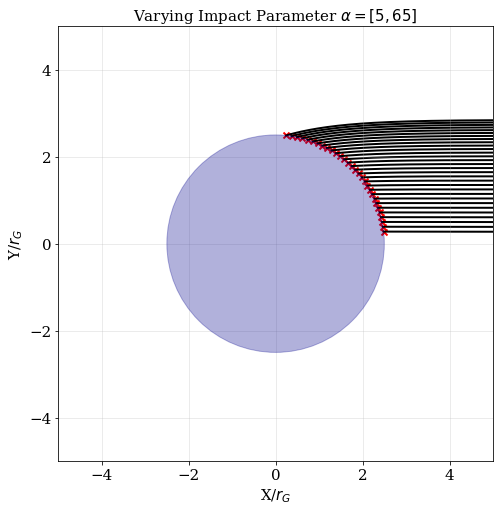

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

# Plotting Event Horizon
# horizon = patches.Circle((0, 0), radius=1, color='black', zorder=150)
# ax.add_patch(horizon)

# # Plotting Neutron Star
surface = patches.Circle((0, 0), radius=R, color='darkblue', zorder=100, alpha=0.3)
ax.add_patch(surface)

ax.patch.set_visible(False)

# Plotting trajectories
for k in range(0, len(sols)):
    ax.plot(sols[k][0], sols[k][1], color='k', zorder=1)
    plt.scatter(sols[k][0][-1], sols[k][1][-1], marker='x', color='r', )

ax.set_xlabel(r"X/$r_G$")
ax.set_ylabel(r"Y/$r_G$")

lim = 5
plt.xlim([-lim, lim])
plt.ylim([-lim, lim])
plt.title(r"Varying Impact Parameter $\alpha = [5, 65]$")
plt.grid(alpha=0.3)

plt.gca().set_aspect('equal')

Text(0, 0.5, 'Relative Error %')

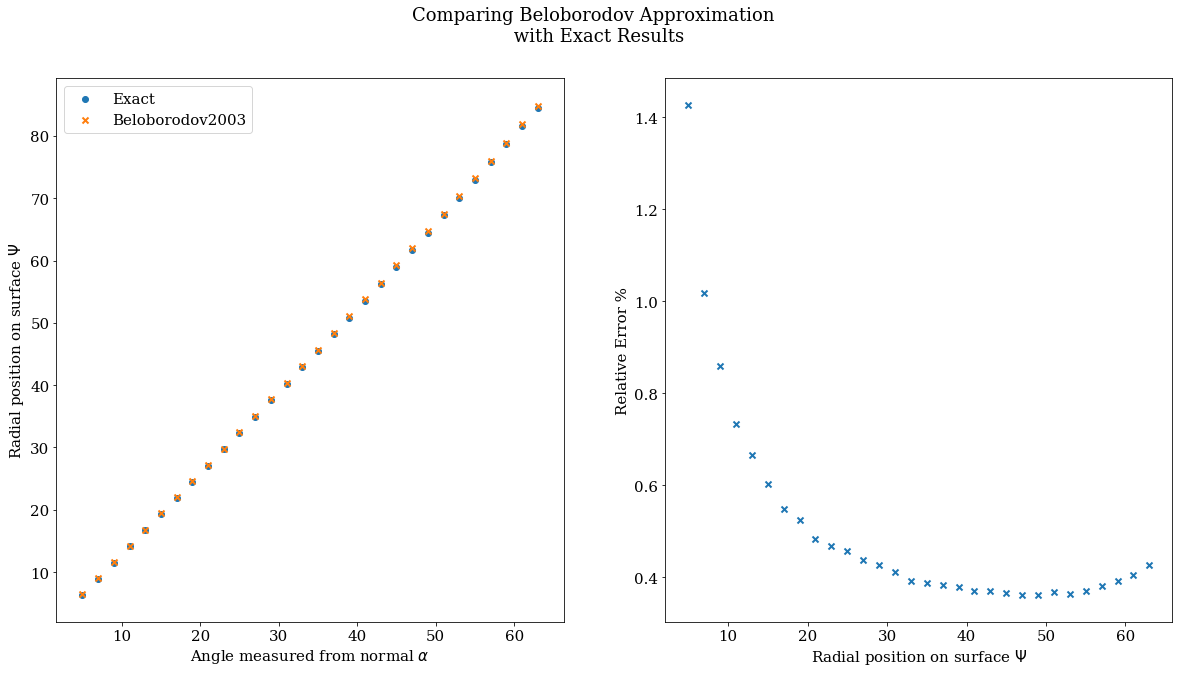

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
fig.suptitle("Comparing Beloborodov Approximation \n with Exact Results")

ax1.scatter(alphaArrayDeg, psiDeg, label='Exact')
ax1.scatter(alphaArrayDeg, beloApproxDeg, marker='x', label='Beloborodov2003')
ax1.set_xlabel(r'Angle measured from normal $\alpha$')
ax1.set_ylabel(r'Radial position on surface $\Psi$')
ax1.legend()

ax2.scatter(alphaArrayDeg, relError, marker='x', label='Beloborodov2003')
ax2.set_xlabel(r'Radial position on surface $\Psi$')
ax2.set_ylabel(r'Relative Error %')